__Author: Manu Jayadharan, University of Pittsburgh, 2020__

# Example 2: Using fluidlearn to solve an elliptic pde: 3d Poission equation.

- This is the second example in the series, intended to act as tutorial for fluidlearn package. 
- New in this example: how to use one of in-built PDE models. We illustrate this by using the _Poisson_ model from the fluidlearn.fluidmodels module. 
- We also show how to manufacture boundary conditions easily using the fluidlearn.dataprocess module, for convergence testing and debugging.

Equation to solve: $-\Delta u -f  = 0$
over domain $\Omega$ .

For demonstration purposes we take $f=-6(x_1 + x_2) - 2$ and $\Omega = [-2,4]\times [0,5]\times [-3,3]$, so we can compare the results with the actual solution $u=x_1^3 + x_2^3 + x_3^2$.

In [5]:
#Import fluidlearn package and classes
import fluidlearn
from fluidlearn import dataprocess
import numpy as np

In [ ]:
#Import fluidlearn package and classes
import fluidlearn
from fluidlearn import dataprocess

### Defining the domain and time interval for which the PDE needs to be solved.
This matters only for generating collocation points and if the user is feeding their own collocation points,
they can skip this step.

In [123]:
#domain range
X_1_domain = [-2, 2]
X_2_domain = [0, 1]
X_3_domain = [0,4]

#domain of the problem
domain_bounds = [X_1_domain, X_2_domain, X_3_domain]

### Manufacturing the boundary data
- We use the fluidlearn.dataprocess.BcIcManufact class to generate points lying on the faces of the hypercube defined by the intervals given in domain_bounds. This is equivalent to randomly selecting points from the domain boundary, $\partial \Omega$.
- We then use our knowledge of the manufactured solution to manufacture the boundary conditions corresponding to these points.
- Note that for this example, we use uniform distribution to randomly select points.

In [124]:
bc_data_size = 1000 #number of data points on boundary

#object to randomly generate points lying on the boundary
bc_generator = dataprocess.BcIcDataManufact(domain_bounds)

In [125]:
X_data = bc_generator.generate_uniform_bc_ic(bc_data_size)

In [126]:
num_intr_dat = 10
X_data = np.concatenate([X_data,np.random.uniform(0,1,3*num_intr_dat).reshape((num_intr_dat,3))])

In [127]:
#Note that we will have bc_data_size number of instances for each boundary
#face
X_data.shape

(6010, 3)

#### Generating the boundary condition from random boundary points using the manufactured solution $u=x_1^3 + x_2^3 + x_3^2$

In [130]:
import numpy as np
Y_data = (X_data[:,0]**3 + X_data[:,1]**3 + X_data[:,2]**2)[:,np.newaxis]


### Defining the rhs function $f=-6(x_1 + x_2) - 2$ of the PDE.

In [132]:
def rhs_function (args, time_dep=False):
        return -6*(args[0]+args[1]) -2

### Defining the model architecture

In [134]:
model_type = 'poisson'
space_dim = 3 #dimension of Omega
time_dependent_problem = False
n_hid_lay=6 #numberof hidden layers in the neural network
n_hid_nrn=30 #number of neurons in each hidden layer
act_func='tanh' #activation function used for hidden layers:  could be elu, relu, sigmoid
loss_list='mse' #type of error function used for cost functin, we use mean squared error.
optimizer='adam' #type of optimizer for cost function minimization
dom_bounds=domain_bounds #domain bounds where collocation points has to be generated

distribution = 'uniform' #type of distribution used for generating the pde collocation points.
number_of_collocation_points = 10000

batch_size = 32 #batch size for stochastic batch gradient type optimization
num_epochs = 10 #number of epochs used for trainng  

### Defining the fluidlearn solver 

In [135]:
#Instantiation of the fluidlearn.fluildlearn.Solver class
poisson3d_model = fluidlearn.Solver()

In [136]:
poisson3d_model(model_type=model_type,
            space_dim=space_dim,
            time_dep=time_dependent_problem,
            output_dim=1,
            n_hid_lay=n_hid_lay,
            n_hid_nrn=n_hid_lay,
            act_func=act_func,
            rhs_func=rhs_function,
            loss_list=loss_list,
            optimizer=optimizer,
            dom_bounds=dom_bounds,
            load_model=False,
            model_path=None)

### Fitting the model

In [137]:
poisson3d_model.fit(
    x=X_data,
    y=Y_data,
    colloc_points=number_of_collocation_points,
    dist=distribution,
    batch_size=batch_size,
    epochs=num_epochs,
)

Epoch 1/10
501/501 [==============================] - 8s 15ms/step - loss: 31.9742 - output_1_loss: 16.1745 - output_2_loss: 15.7997
Epoch 2/10
501/501 [==============================] - 8s 17ms/step - loss: 20.7385 - output_1_loss: 12.2779 - output_2_loss: 8.4605
Epoch 3/10
501/501 [==============================] - 8s 16ms/step - loss: 11.8072 - output_1_loss: 7.1775 - output_2_loss: 4.6297
Epoch 4/10
501/501 [==============================] - 9s 17ms/step - loss: 6.0623 - output_1_loss: 3.9346 - output_2_loss: 2.1277
Epoch 5/10
501/501 [==============================] - 8s 17ms/step - loss: 3.7272 - output_1_loss: 2.5057 - output_2_loss: 1.2215
Epoch 6/10
501/501 [==============================] - 8s 17ms/step - loss: 2.2637 - output_1_loss: 1.5694 - output_2_loss: 0.6943
Epoch 7/10
501/501 [==============================] - 9s 18ms/step - loss: 1.5779 - output_1_loss: 1.1181 - output_2_loss: 0.4598
Epoch 8/10
501/501 [==============================] - 9s 18ms/step - loss: 1.1895 - 

### Resuming Training  the model again for 50 more epochs

In [138]:
poisson3d_model.fit(
    x=X_data,
    y=Y_data,
    colloc_points=number_of_collocation_points,
    dist=distribution,
    batch_size=batch_size,
    epochs=20,
)

Epoch 1/20
501/501 [==============================] - 8s 16ms/step - loss: 0.5891 - output_1_loss: 0.4347 - output_2_loss: 0.1544
Epoch 2/20
501/501 [==============================] - 7s 15ms/step - loss: 0.5025 - output_1_loss: 0.3705 - output_2_loss: 0.1320
Epoch 3/20
501/501 [==============================] - 8s 16ms/step - loss: 0.4789 - output_1_loss: 0.3509 - output_2_loss: 0.1280
Epoch 4/20
501/501 [==============================] - 8s 16ms/step - loss: 0.4606 - output_1_loss: 0.3293 - output_2_loss: 0.1313
Epoch 5/20
501/501 [==============================] - 10s 21ms/step - loss: 0.3550 - output_1_loss: 0.2634 - output_2_loss: 0.0915
Epoch 6/20
501/501 [==============================] - 9s 18ms/step - loss: 0.3180 - output_1_loss: 0.2331 - output_2_loss: 0.0849
Epoch 7/20
501/501 [==============================] - 9s 17ms/step - loss: 0.3354 - output_1_loss: 0.2379 - output_2_loss: 0.0975
Epoch 8/20
501/501 [==============================] - 9s 18ms/step - loss: 0.2543 - outpu

### Demo Using the trained model for predicton

In [149]:
num_test_points = 500
X_test = np.random.uniform(0,1,3*num_test_points).reshape(num_test_points,3)
X_test = np.concatenate([np.random.uniform(X_1_domain[0],X_1_domain[1],num_test_points).reshape(num_test_points,1),
                         np.random.uniform(X_2_domain[0],X_2_domain[1],num_test_points).reshape(num_test_points,1),
                         np.random.uniform(X_3_domain[0],X_3_domain[1],num_test_points).reshape(num_test_points,1)],
                        axis=1)

In [150]:
Y_test = X_test[:,0]**3 + X_test[:,1]**3 + X_test[:,2]**2

In [151]:
Y_pred = poisson3d_model.predict(X_test)

In [152]:
Y_pred = np.squeeze(Y_pred,axis=1)
Y_pred.shape

(500,)

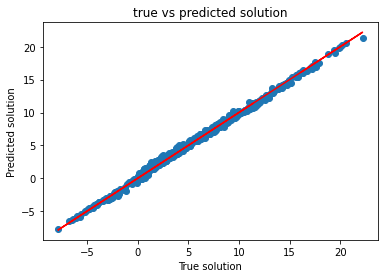

In [153]:
plt.plot(Y_test,Y_pred,'o',Y_test, Y_test,'r-')
plt.title("true vs predicted solution")
plt.xlabel("True solution")
plt.ylabel("Predicted solution")
plt.show()

In [48]:
path_to_save_model = "saved_model/model_name"
poisson3d_model.save_model(path_to_save_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/model_name\assets
